In this notebook is resulting data frame from notebook 01 used and goal is to determine percent for cutt off outlier detection method when several percents compared. Final decision for now is 0.9. 

In [1]:
import sys
sys.path.append('../..')
from src.modules.cutoff_rf import *
import matplotlib.pyplot as plt

# Read data

In [15]:
file = '../../results/5sta(DNOWS)_3com(NO2,PM10K,O3)_year2010_TemporalDummies_Ox_holidays_meteo.csv'
df_o = pd.read_csv(file, index_col=0, parse_dates=True).drop(columns=['N_Ox','S_Ox']) # exclude Ox
df_o

,D_NO2,D_PM10K,N_NO2,N_O3,N_PM10K,O_NO2,O_PM10K,S_NO2,S_O3,S_PM10K,...,Sud_Windspeed,West_RH,West_Temp,West_Winddirection,West_Windspeed,Ost_Pressure,Ost_RH,Ost_Temp,Ost_Winddirection,Ost_Windspeed
2010-01-01,62.420425,48.681210,37.758297,4.000452,34.853405,52.362980,41.291916,45.165530,2.108327,58.876480,...,0.358427,83.031044,3.497470,189.95006,0.326422,NaN,NaN,NaN,NaN,NaN
2010-01-02,49.886177,148.307540,25.938934,4.637932,45.783848,36.956390,76.422780,33.300850,1.795727,169.943600,...,0.279739,86.777100,3.033653,214.33745,0.206639,NaN,NaN,NaN,NaN,NaN
2010-01-03,21.900616,21.664154,11.074873,34.357640,10.978717,15.286636,16.273163,14.216703,30.359385,19.864191,...,1.893668,56.488766,2.953737,278.73930,2.640419,NaN,NaN,NaN,NaN,NaN
2010-01-04,36.261917,21.462568,18.268064,48.127280,14.785930,24.183193,20.439781,26.544174,43.230330,26.680067,...,1.136650,44.811253,-0.571709,285.80966,1.023319,NaN,NaN,NaN,NaN,NaN
2010-01-05,71.757225,53.670230,41.781490,12.211806,32.000100,42.627240,43.426716,51.446163,7.382785,54.818146,...,0.428190,73.859795,-4.016794,198.60895,0.356867,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-03,33.136486,18.087683,14.935202,47.710407,18.953040,19.609596,14.622527,21.049612,36.083650,15.733115,...,0.673823,57.975098,18.413990,264.72040,0.624361,973.1446,73.206460,18.672241,182.59240,0.435133
2021-07-04,19.907900,14.338615,8.624179,78.167210,15.033513,14.503092,14.373650,13.824055,67.281296,14.214394,...,0.901104,49.535610,21.988039,179.25130,0.576749,972.4365,60.177140,22.199862,130.74823,0.562957
2021-07-05,20.364044,16.338556,16.112087,66.048890,17.262230,12.612704,15.058688,12.696744,70.662820,13.985309,...,0.634559,58.139606,20.624140,174.17639,0.545803,969.7183,71.621360,20.727047,139.74475,0.418278
2021-07-06,24.437843,19.290907,7.977263,71.018890,15.782174,15.851383,17.253944,13.073669,58.211086,14.010532,...,1.140109,57.618786,21.858849,198.03795,0.677458,969.6665,74.613620,21.856710,129.45146,0.462159


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_o.describe()

,D_NO2,D_PM10K,N_NO2,N_O3,N_PM10K,O_NO2,O_PM10K,S_NO2,S_O3,S_PM10K,...,Sud_Windspeed,West_RH,West_Temp,West_Winddirection,West_Windspeed,Ost_Pressure,Ost_RH,Ost_Temp,Ost_Winddirection,Ost_Windspeed
count,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,...,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,1505.000000,1500.000000,1504.000000,1505.000000,1505.000000
mean,43.595417,30.735860,21.869776,42.545117,22.792116,28.808068,29.539223,29.825292,38.012565,29.547904,...,0.769687,70.982783,11.296831,196.320265,0.645270,973.096764,76.989486,11.875546,190.254824,0.539233
std,15.690114,18.036184,12.649584,26.399376,13.776796,13.318368,16.866513,14.938609,24.721155,19.167553,...,0.450628,12.925327,8.212051,41.642331,0.398195,7.153309,14.906745,8.359782,36.510157,0.197497
min,8.024886,2.248819,1.144127,0.000000,0.000000,1.981802,4.071145,2.919650,0.069498,3.718005,...,0.103551,34.736824,-9.584766,47.674210,0.114222,947.682430,32.852955,-10.223562,79.586970,0.203868
25%,32.500235,18.923602,12.390112,18.307541,13.608377,19.237674,17.959161,19.188356,14.653408,16.629211,...,0.455053,61.199764,4.496563,169.862770,0.404987,968.981140,66.044224,4.780565,165.894350,0.403387
50%,41.690505,26.244127,18.470858,44.293581,19.890628,26.441980,25.012568,26.452030,38.703930,23.891443,...,0.690506,70.896745,11.591323,192.494135,0.544758,973.470200,77.561410,12.126035,189.151110,0.505926
75%,52.259408,38.216679,29.293025,63.992943,28.501022,36.355739,36.967094,37.753626,57.873177,37.210489,...,0.949768,81.130003,18.080129,217.380593,0.739333,977.403560,89.094487,19.320462,213.590820,0.630840
max,137.524250,193.199520,93.462555,114.304600,208.103590,102.040640,176.834300,116.251520,107.530620,189.072590,...,4.228529,99.462560,29.578932,334.660580,4.281688,998.182300,100.000000,28.975866,315.755700,1.745258


# In the moment interesting to us is only data until 2020-03-10.
Train set '2010-01-01':'2020-01-02'<br>
Test set '2020-01-03':'2020-03-10'

In [4]:
df_o.loc[:'2020-03-10'].describe()

,D_NO2,D_PM10K,N_NO2,N_O3,N_PM10K,O_NO2,O_PM10K,S_NO2,S_O3,S_PM10K,...,Sud_Windspeed,West_RH,West_Temp,West_Winddirection,West_Windspeed,Ost_Pressure,Ost_RH,Ost_Temp,Ost_Winddirection,Ost_Windspeed
count,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,...,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,1027.000000,1022.000000,1027.000000,1027.000000,1027.000000
mean,45.218914,31.547446,22.684431,41.796054,23.267162,29.967900,30.317978,30.960558,37.541907,30.476884,...,0.763236,71.422723,11.229391,195.380513,0.647984,973.024333,77.006798,11.889543,190.696267,0.528115
std,15.550307,18.368440,12.793750,26.479948,14.093080,13.270686,17.120336,15.114708,24.828460,19.598930,...,0.450293,12.898748,8.272233,42.189785,0.409810,7.113718,14.309471,8.512589,35.997076,0.195070
min,9.518155,2.971749,1.173807,0.000000,0.000000,4.400391,5.188771,4.178319,0.069498,3.718005,...,0.103551,34.736824,-9.584766,47.674210,0.114222,947.682430,32.852955,-10.223562,79.586970,0.203868
25%,34.737328,19.442526,13.090115,17.613136,13.741689,20.579014,18.453783,20.113351,14.316038,17.203885,...,0.453190,61.861357,4.379237,168.352672,0.402718,969.016000,66.682192,4.561659,166.770685,0.391357
50%,43.322416,26.856526,19.159588,42.902060,20.186913,27.573324,25.873359,27.551803,37.235730,24.683065,...,0.677249,71.579428,11.530536,191.264025,0.541061,973.389200,77.760727,12.100109,190.211040,0.493894
75%,53.537508,39.139650,30.433292,63.185883,29.335691,37.591898,38.099715,38.974631,57.428259,38.692126,...,0.941996,81.624685,18.066071,216.278378,0.742664,977.232605,88.397517,19.535705,213.997710,0.617190
max,137.524250,193.199520,93.462555,114.304600,208.103590,102.040640,176.834300,116.251520,107.530620,189.072590,...,4.228529,99.462560,29.578932,333.745820,4.281688,998.182300,100.000000,28.530237,315.755700,1.564968


In [5]:
# this is part of the data planned as test set
df_o.loc['2020-01-03':'2020-03-10'].describe()

,D_NO2,D_PM10K,N_NO2,N_O3,N_PM10K,O_NO2,O_PM10K,S_NO2,S_O3,S_PM10K,...,Sud_Windspeed,West_RH,West_Temp,West_Winddirection,West_Windspeed,Ost_Pressure,Ost_RH,Ost_Temp,Ost_Winddirection,Ost_Windspeed
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,48.634287,34.501826,30.305649,27.572678,24.548173,34.156691,34.610453,36.367930,19.308494,34.004131,...,0.711420,69.935219,3.609313,204.967356,0.623884,975.552890,74.809917,3.284287,218.332091,0.510271
std,11.164974,14.481385,10.815856,18.890197,13.360582,10.796889,17.701200,9.839605,16.257785,15.771196,...,0.547210,12.827894,3.585214,35.128717,0.353670,9.695958,14.763924,3.513040,28.862669,0.232127
min,22.483686,12.693242,3.258434,3.640017,5.848534,8.865420,11.327099,12.584035,1.075885,9.115947,...,0.215226,39.567158,-3.436678,134.916630,0.180958,955.313660,38.370950,-3.413193,148.257780,0.255820
25%,42.720980,23.553053,23.544819,7.489865,13.852961,26.348799,20.753122,29.930518,3.712569,22.325492,...,0.367415,59.870014,0.773546,181.464040,0.388591,968.466080,63.637777,0.456397,199.388567,0.347654
50%,48.953763,33.162876,30.640994,24.640518,20.402628,34.078868,32.937144,36.847005,14.903102,32.649362,...,0.461645,71.562705,3.730776,205.193725,0.507559,977.449470,75.706465,3.422725,218.945690,0.448555
75%,55.165355,42.976992,38.924506,42.014646,34.307013,40.700327,41.231343,41.869546,30.562565,44.392767,...,0.868900,80.722808,5.724806,222.772590,0.747699,983.009613,86.013825,5.524393,233.179670,0.573168
max,81.796200,78.772090,53.359676,70.230950,65.558110,58.142500,111.510895,65.051390,58.615130,78.225700,...,2.818312,93.035805,10.753644,309.658020,2.131144,998.182300,100.000000,9.786473,294.971040,1.244574


# Define df from 2010-01-01 to 2020-01-03 which is train set. <br>When using cut off method we cannot touch test set.

# Check some quantiles

In [24]:
pd.concat([df_o.quantile(.001), df_o.min()], axis=1)

,0.001,0.000
D_NO2,10.886677,8.024886
D_PM10K,4.242437,2.248819
N_NO2,2.047035,1.144127
N_O3,0.138583,0.000000
N_PM10K,1.273218,0.000000
...,...,...
Ost_Temp,-9.631702,-10.223562
Ost_Winddirection,85.948425,79.586970
Ost_Windspeed,0.217036,0.203868
holiday_sunday,0.000000,0.000000


In [25]:
pd.concat([df_o.quantile(.999), df_o.max()], axis=1)

,0.999,0.000
D_NO2,116.800674,137.524250
D_PM10K,146.921945,193.199520
N_NO2,72.393435,93.462555
N_O3,104.890556,114.304600
N_PM10K,118.542763,208.103590
...,...,...
Ost_Temp,28.250596,28.975866
Ost_Winddirection,308.207347,315.755700
Ost_Windspeed,1.550936,1.745258
holiday_sunday,1.000000,1.000000


# Add additional features
* holiday_sunday - 1 if holiday falls on Sunday
* month - month in a year (1 to 12)

In [26]:
df_o['holiday_sunday'] = holiday_sunday(df_o)
df_o['month'] = month(df_o)

# Compare different cut off percents, and choose the best one which will be used further with all forecast models

* # Errors are calculated based on the random forest prediction for period of test set '2020-01-03':'2020-03-10' trained on train set '2010-01-01':'2020-01-02'

In [17]:
# 5 cutoffs, and for each cutoff 5 random states
cutoffs = [0.80,0.85,0.90,0.95,0.99]
randomstates = [0,1,5,42,111]

In [33]:
%%time
# mean of results for each random state calculated
df_errors = cutoff_errors(df_o, cutoffs, randomstates)
df_errors

Wall time: 6min 22s


,D_NO2,N_NO2,O_NO2,S_NO2,W_NO2,D_PM10K,N_PM10K,O_PM10K,S_PM10K,W_PM10K,N_O3,S_O3
RMSE_0.8_,9.362854,8.249029,7.888484,6.757816,7.605325,11.860739,9.443329,17.106421,10.492753,9.887854,9.979122,6.737470
MAE_0.8_,7.466300,6.604647,6.119446,5.347036,5.977553,8.655974,6.811022,11.260744,8.021244,6.980041,7.774749,5.406098
R2_0.8_,0.286186,0.409623,0.458178,0.521251,0.509897,0.318982,0.492961,0.052073,0.550747,0.487185,0.716723,0.825648
RMSE_0.85_,9.578266,7.234595,7.531244,6.822816,6.599597,11.583366,8.596764,16.316228,9.778751,9.214409,9.783007,6.606094
MAE_0.85_,7.664808,5.884206,5.892463,5.650540,5.239710,8.447482,6.218065,10.711932,7.690535,6.466626,7.693255,5.327185
R2_0.85_,0.253022,0.545887,0.506138,0.511938,0.630907,0.350566,0.579800,0.137660,0.609765,0.554625,0.727737,0.832345
RMSE_0.9_,10.052767,6.716461,7.530080,7.667601,6.074735,11.711126,8.087501,15.750971,9.897583,8.662087,9.638535,6.586684
MAE_0.9_,7.906298,5.408543,5.990994,6.388432,4.773004,8.705487,5.806356,10.258116,8.117066,6.016803,7.505183,5.314900
R2_0.9_,0.176984,0.608599,0.506266,0.383660,0.687246,0.336208,0.628075,0.196379,0.600234,0.606395,0.735719,0.833318
RMSE_0.95_,10.668788,6.486444,7.835483,9.176258,6.005396,12.422863,7.767243,15.213400,11.188410,8.450606,9.615816,6.566560


In [32]:
#df_errors.to_csv('../../results/df_errors.csv')

* # Compare cutoffs, choose the best one which will be further used
> ## For each station-pollutant filtered cutoff with minimum R2 score

In [7]:
# first print shows sum of best cutoff cases
r2_comp = r2_compare(df_errors)
r2_comp

R2_0.95_    4
R2_0.99_    3
R2_0.8_     2
R2_0.85_    2
R2_0.9_     1
Name: R2, dtype: int64


,R2,R2_val
D_NO2,R2_0.8_,0.286186
N_NO2,R2_0.99_,0.637341
O_NO2,R2_0.9_,0.506266
S_NO2,R2_0.8_,0.521251
W_NO2,R2_0.95_,0.694358
D_PM10K,R2_0.85_,0.350566
N_PM10K,R2_0.99_,0.683961
O_PM10K,R2_0.99_,0.279260
S_PM10K,R2_0.85_,0.609765
W_PM10K,R2_0.95_,0.625412


# Visual inspection

* ## R2 box plot for all cutoffs

<AxesSubplot:>

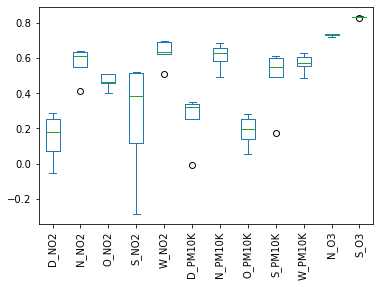

In [27]:
df_errors.loc[[i for i in df_errors.index if 'R2_' in i]].plot.box(rot=90)

## R2 line plot for all cutoffs

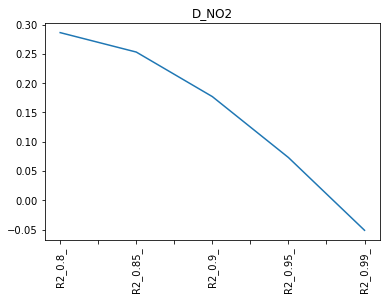

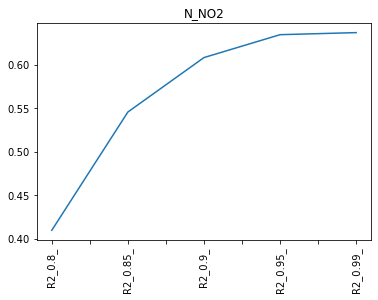

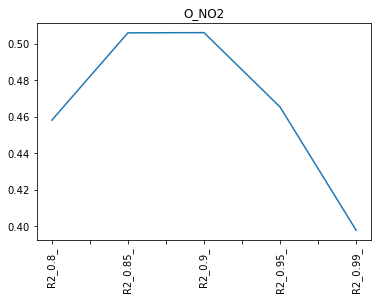

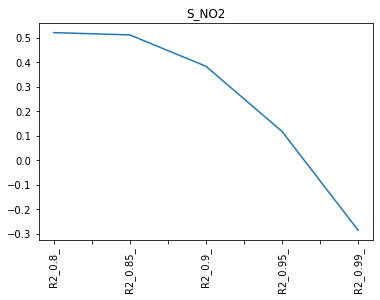

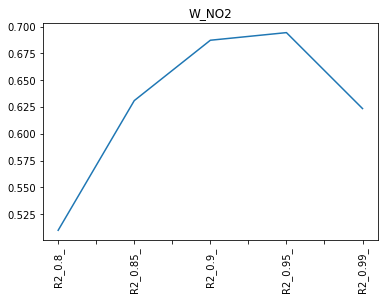

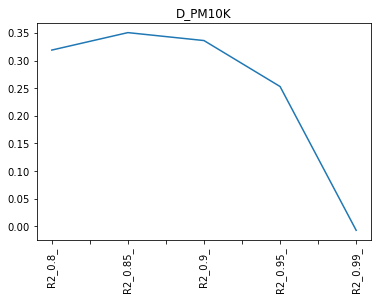

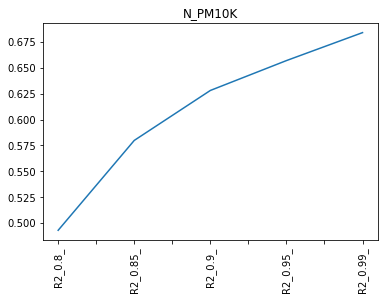

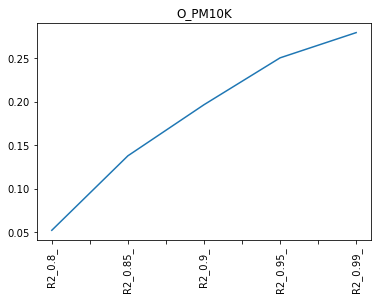

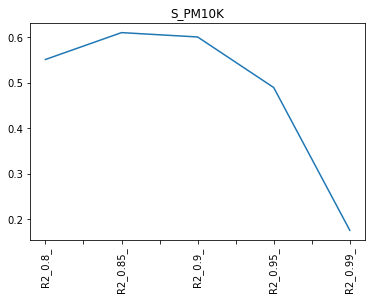

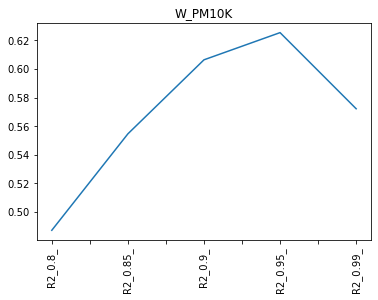

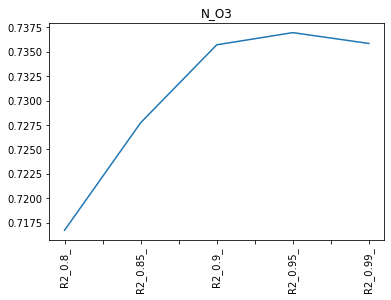

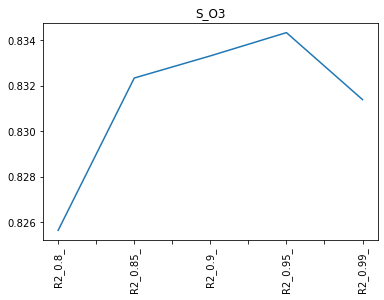

In [28]:
df_errors_r2 = df_errors.loc[[i for i in df_errors.index if 'R2_' in i]]
for col in df_errors_r2.columns:
        df_errors_r2[col].plot(title=col)
        plt.xticks(rotation=90)
        plt.show()

* ## Impact of cutoff on look of original data

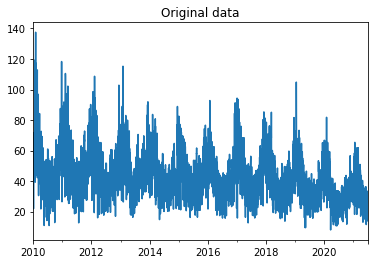

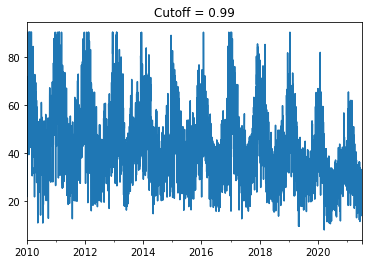

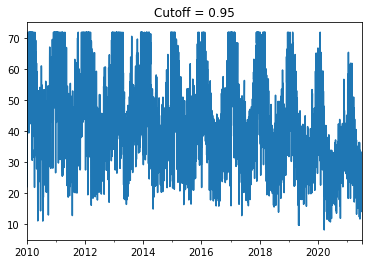

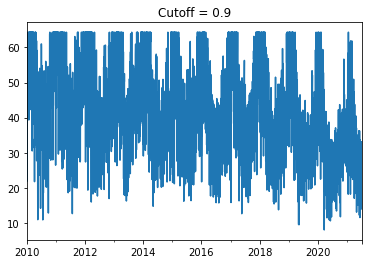

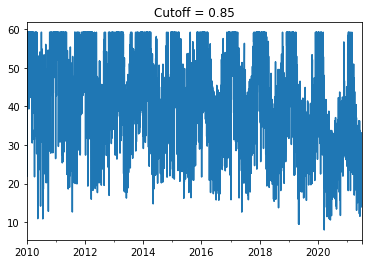

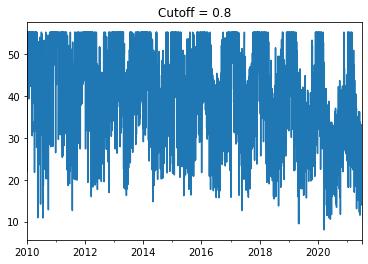

In [29]:
df_o['D_NO2'].plot(title='Original data')
plt.show()
cutoffs_reverse = cutoffs.copy()
cutoffs_reverse.sort(reverse=True)
for cutoff in cutoffs_reverse:
    df_cut = cut_off(df_o, cutoff)
    df_cut['D_NO2'].plot(title=f'Cutoff = {cutoff}')
    plt.show()

# For now, final cutoff for further use is 0.9<br>